  <h1 style="margin: 0; padding: 0;">
    <span style="color: #3495eb; font-size: 60px;">Ecommerce Customers</span>
  </h1>

# My Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
%matplotlib inline

# Remove Warning :

In [2]:
import warnings
warnings.simplefilter("ignore")

# Dataset :

In [3]:
Ecommerce = pd.read_csv('Ecommerce Customers.txt')
Ecommerce.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Exploring The Data :

### Data info :

In [4]:
Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Data shape

In [5]:
print(Fore.LIGHTBLUE_EX + 'Number of Rows is : ', Ecommerce.shape[0])
print(Fore.LIGHTBLUE_EX + 'Number of columns is : ', Ecommerce.shape[1])

Number of Rows is :  500
Number of columns is :  8


### Data duplicates :

In [6]:
print(Fore.LIGHTBLUE_EX,'There is "{}" complete duplicate'.format(Ecommerce.duplicated().sum()))

 There is "0" complete duplicate


### Number of NaN values :

In [7]:
Ecommerce.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Summary statistics of the data :

In [8]:
Ecommerce.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


### Distribution of Yearly Amount Spent

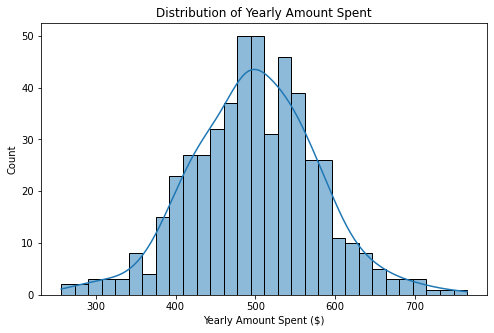

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(Ecommerce['Yearly Amount Spent'], bins=30, kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent ($)')
plt.ylabel('Count')
plt.show()

#### Most customers spend between 350 and 600 annually.

### Correlation Heatmap

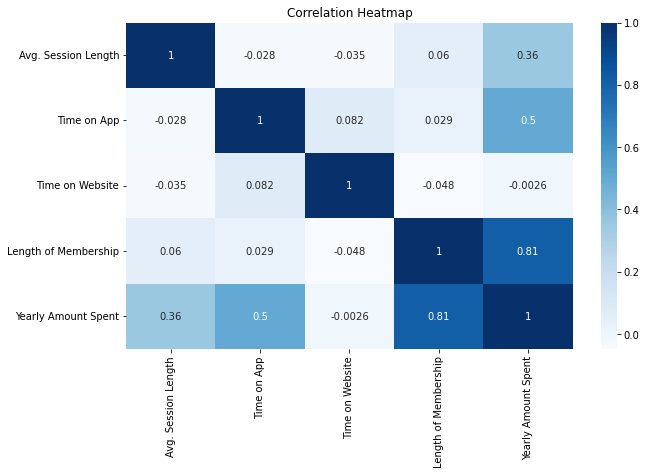

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(Ecommerce.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

#### Length of Membership has the strongest positive correlation with Yearly Amount Spent.

### Relationships between all numeric columns

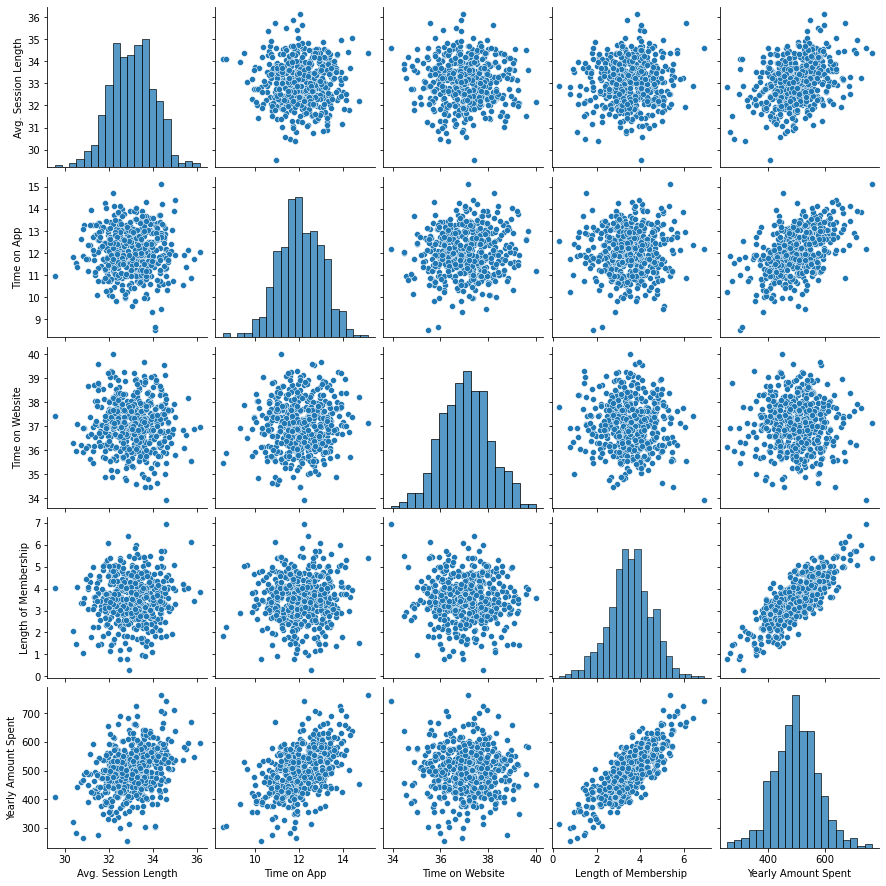

In [11]:
sns.pairplot(Ecommerce)
plt.show()

#### - Slight positive trend between Time on App and spending.

#### - No clear trend between Time on Website and spending.

### App vs Website

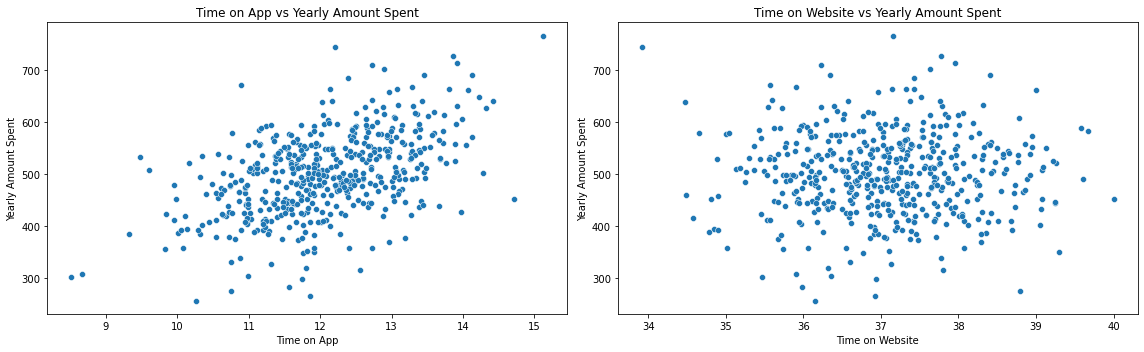

In [14]:
# Define figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Time on App vs Yearly Amount Spent
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=Ecommerce, ax=axes[0])
axes[0].set_title('Time on App vs Yearly Amount Spent')

# Time on Website vs Yearly Amount Spent
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=Ecommerce, ax=axes[1])
axes[1].set_title('Time on Website vs Yearly Amount Spent')

# Show the full plot
plt.tight_layout()
plt.show()


#### We can see that more time spent on the app is generally associated with higher spending. Also, I think that improving the website experience may not significantly boost spending.

### Membership Length vs Spending

<Figure size 576x360 with 0 Axes>

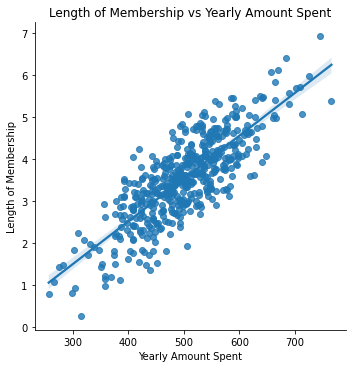

In [15]:
plt.figure(figsize=(8,5))
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=Ecommerce)
plt.title('Length of Membership vs Yearly Amount Spent')
plt.show()


#### - A very strong positive relationship.
#### - Customers who have been members for longer spend more.

# Training and Testing Data :

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Ecommerce.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
X=Ecommerce.drop(['Email', 'Address', 'Avatar','Yearly Amount Spent'],axis=1)
y=Ecommerce['Yearly Amount Spent']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model :

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
print(pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']))

                      Coefficient
Avg. Session Length     26.029489
Time on App             38.709835
Time on Website          0.356184
Length of Membership    61.472809


# Predicting Test Data : 

In [33]:
predictions = lm.predict( X_test)

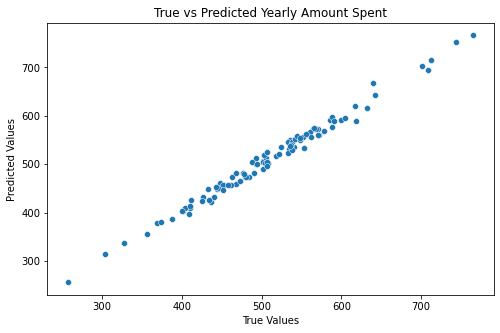

In [39]:
# Create a scatterplot of the real test values versus the predicted values.
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Yearly Amount Spent')
plt.show()

# Evaluating the Model : 

In [35]:
# calculate these metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.758907540457823
MSE: 91.82335857016862
RMSE: 9.582450551407433


# Residuals :

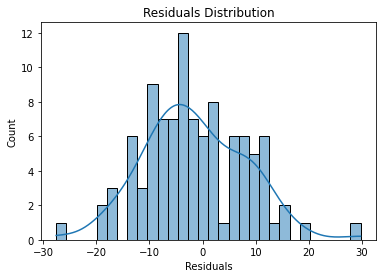

In [37]:
sns.histplot((y_test - predictions), bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# Final Recommendations : 

1-Prioritize Mobile App Development
* Time on App positively influences yearly spending.
* Investing in better app features, user experience, and promotions through the app is likely to increase revenue.
----------------
2-Website Optimization is a Lower Priority
* Time on Website is not correlated with spending.
* Resources should be directed more towards mobile rather than heavy website upgrades.